In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load dataset
data = pd.read_csv('data_evaluacion.csv')

In [3]:
# Data preprocessing
le = LabelEncoder()

In [4]:
# Encode categorical variables
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

In [5]:
# Split dataset into features and labels
X = data.drop('<=50K', axis=1)
y = data['<=50K']

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Define kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

# Train and evaluate SVM models with different kernels
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    results.append({
        'kernel': kernel,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'model': model
    })

In [9]:
# Identify the best model
best_model = max(results, key=lambda x: x['test_accuracy'])

In [10]:
# Check for overfitting or underfitting
for result in results:
    kernel = result['kernel']
    train_accuracy = result['train_accuracy']
    test_accuracy = result['test_accuracy']

    print(f"Kernel: {kernel}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    if train_accuracy > test_accuracy:
        print("Overfitting detected")
    elif train_accuracy < test_accuracy:
        print("Underfitting detected")
    else:
        print("Good fit")
    print()

Kernel: linear
Train Accuracy: 0.8141160641160641
Test Accuracy: 0.8176482631543028
Underfitting detected

Kernel: poly
Train Accuracy: 0.8476658476658476
Test Accuracy: 0.8461748447416911
Overfitting detected

Kernel: rbf
Train Accuracy: 0.8555341055341056
Test Accuracy: 0.8524534225073364
Overfitting detected

Kernel: sigmoid
Train Accuracy: 0.7507897507897507
Test Accuracy: 0.752883368593462
Underfitting detected



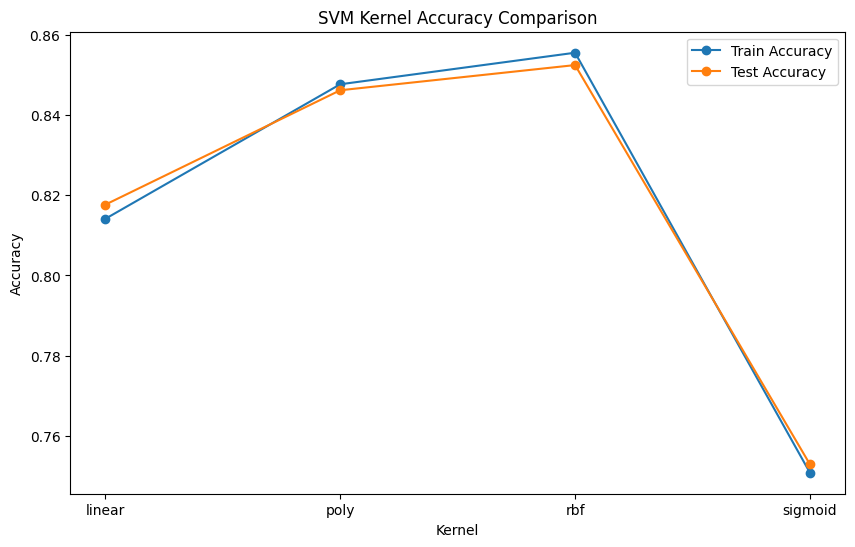

In [11]:
# Plotting accuracy for each kernel
kernel_names = [result['kernel'] for result in results]
train_accuracies = [result['train_accuracy'] for result in results]
test_accuracies = [result['test_accuracy'] for result in results]

plt.figure(figsize=(10, 6))
plt.plot(kernel_names, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(kernel_names, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVM Kernel Accuracy Comparison')
plt.legend()
plt.show()
